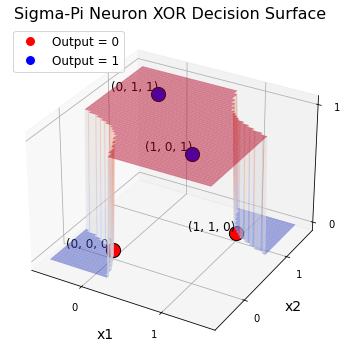

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sigma-Pi neuron function for XOR
def sigma_pi_neuron(x1, x2):
    w1, w2, w3, b = 1, 1, -2, 0  # Weights and bias
    sum_part = w1 * x1 + w2 * x2
    product_part = w3 * (x1 * x2)  # Multiplicative interaction term
    output = sum_part + product_part + b
    return 1 if output > 0 else 0  # Activation function (step)

# Generate input points
x1_vals = np.array([0, 0, 1, 1])
x2_vals = np.array([0, 1, 0, 1])
outputs = np.array([sigma_pi_neuron(x1, x2) for x1, x2 in zip(x1_vals, x2_vals)])

# Create a grid for decision surface
x1_grid, x2_grid = np.meshgrid(np.linspace(-0.5, 1.5, 50), np.linspace(-0.5, 1.5, 50))
z_grid = np.array([[sigma_pi_neuron(x1, x2) for x1, x2 in zip(x1_row, x2_row)] for x1_row, x2_row in zip(x1_grid, x2_grid)])

# Create 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for XOR points with labels
for i in range(4):
    color = 'blue' if outputs[i] == 1 else 'red'
    ax.scatter(x1_vals[i], x2_vals[i], outputs[i], color=color, s=200, edgecolors='black')
    ax.text(x1_vals[i], x2_vals[i], outputs[i], f"({x1_vals[i]}, {x2_vals[i]}, {outputs[i]})",
            fontsize=12, verticalalignment='bottom', horizontalalignment='right')

# Plot decision surface only
ax.plot_surface(x1_grid, x2_grid, z_grid, cmap="coolwarm", alpha=0.5)

# Labels and title
ax.set_xlabel('x1', fontsize=14)
ax.set_ylabel('x2', fontsize=14)
ax.set_zlabel('Output (XOR)', fontsize=14)
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_zticks([0, 1])
ax.set_title("Sigma-Pi Neuron XOR Decision Surface", fontsize=16)

# Add legend
scatter_red = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label="Output = 0")
scatter_blue = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label="Output = 1")
ax.legend(handles=[scatter_red, scatter_blue], loc="upper left", fontsize=12)

# Show plot
plt.show()
